# Initial GPEs 

We compute the $R^2$ and $\% ISE$ values:

In [26]:
import postprocessing

R2score_vec, ISE_vec = postprocessing.compute_R2_ISE()


Statistics on test set for GPE trained for the output LVV:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output RVV:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output LAV:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output RAV:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output LVOTdiam:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output RVOTdiam:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output LVmass:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output LVWT:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output LVEDD:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output SeptumWT:
  R2 = 1.00
  %ISE = 100.00 %


Statistics on test set for GPE trained for the output RVlongdiam:
  

> The maximum scores were achieved for all the emulators, except for the emulator of the TAT that achieved \(R^2=0.99\) and TATLV\textsubscript{endo} that achieved a \(ISE=98.86\%\). 

# Global Sensitivity Analysis

> First-order effects of the GSA when modifying anatomical and functional parameters are presented in Fig 5.4.

<img src="./figures/GSA1_small.png"  width="70%" />

The image above was built in PPT, putting together individual pies. To print all the single pies, run:

/home/crg17/Desktop/KCL_projects/fitting/python/postprocessing.py:954: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if input_labels == []:


KeyboardInterrupt: 

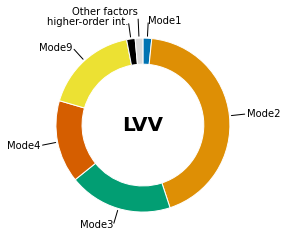

In [27]:
import postprocessing
import numpy as np

input_labels=np.genfromtxt("/media/crg17/Seagate Expansion Drive/param_labels.txt", dtype="str", delimiter="\n")
postprocessing.full_GSA(subfolder="initial_sweep", output_labels_dir="/media/crg17/Seagate Expansion Drive/biomarkers_labels.txt", input_labels=input_labels, first_order=True, second_order=False)

The results are in ```/media/crg17/Seagate Expansion Drive/initial_sweep/figures```

> In Fig \ref{fig:GSA2}, we show the second-order interactions for each output.

<img src="./figures/GSA2_small.png"  width="70%" />

The image above was built in PPT, putting together individual networks. The text in the centre of each network is also written manually. To print all the single networs, run:

In [ ]:
import postprocessing
import numpy as np

input_labels=np.genfromtxt("/media/crg17/Seagate Expansion Drive/param_labels.txt", dtype="str", delimiter="\n")
postprocessing.full_GSA(subfolder="initial_sweep", output_labels_dir="/media/crg17/Seagate Expansion Drive/biomarkers_labels.txt", input_labels=input_labels, first_order=False, second_order=True)

The results are in ```/media/crg17/Seagate Expansion Drive/initial_sweep/figures```

# Calibration to literature data

> We extracted these biomarkers from the NORRE study\cite{Kou2014EchocardiographicStudy}, and ran three waves of BHM.

To run the three waves using literature data (* **heavy computationally** *):

In [ ]:
import pipeline_bhm

pipeline_bhm.literature(run_wave0=True, run_wave1=True, run_wave2=True)

>By the last wave, the original space was reduced to \(9.55\%\) of the original space size, with a maximum uncertainty quotient of \(1.9\), and a median value of \(0.67\).

To obtain the numbers above we run:

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/Seagate Expansion Drive/initial_sweep/NROY_rel_literature.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/Seagate Expansion Drive/literature/wave1/NROY_rel_literature.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/Seagate Expansion Drive/literature/wave2/NROY_rel_literature.dat", dtype=float)

total_reduction = round(wave0_NROY_rel*1e-4*wave1_NROY_rel*wave2_NROY_rel,2)

uncertainty_quotient_vec = np.genfromtxt("/media/crg17/Seagate Expansion Drive/literature/wave2/variance_quotient_wave2_literature.dat", dtype=float)

print(total_reduction)
print(np.max(uncertainty_quotient_vec))
print(np.median(uncertainty_quotient_vec))

> In Fig 5.6 we show how the biomarkers obtained when simulating and emulating in the NROY region fall better within the range reported in the literature, as we run more waves.

<img src="./figures/output_evolution_small.png"  width="70%" />

The image above was built in PPT, putting together individual plots. To print all the single plots, run:

In [ ]:
import postprocessing

postprocessing.plot_output_evolution_seaborn(first_wave = 0, last_wave = 2,
                                   subfolder = "literature", only_feasible = False,
                                   output_labels_dir = "/media/crg17/Seagate Expansion Drive/biomarkers_labels.txt",
                                   exp_mean_name = "anatomy_EP_lit_mean.txt",
                                   exp_std_name = "anatomy_EP_lit_sd.txt",
                                   units_dir = "/media/crg17/Seagate Expansion Drive/biomarkers_units.txt")

The results are in ```/media/crg17/Seagate Expansion Drive/literature/figures```

# Calibration to synthetic patient data

To run the four waves using data from subject #01 (* **heavy computationally** *):

In [ ]:
import pipeline_bhm

pipeline_bhm.patient(patient_number=1, run_wave0=True, run_wave1=True, run_wave2=True, run_wave3=True, sd_magnitude=10)

> Compared to the initial space, the biggest reduction in NROY size happened in the first wave, with a reduction down to \(11.06\%\) of the original space. In the third wave, the space was reduced to \(8.89\%\) of the original size.

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient1_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave1/NROY_rel_patient1_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave2/NROY_rel_patient1_sd_10.dat", dtype=float)

print(wave0_NROY_rel)
print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.),2))
print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2))

> Using as ground truth the biomarkers extracted from that mesh, the implausibility of that point in the third wave was \(0.9\).

In [ ]:
implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave2/implausibilities_patient1_sd_10.dat", dtype=float)

print(np.max(implausibility))

> In the case of subject \(\#01\) in the third wave, although the maximum value of the variance quotient across all space was \(2.23\), the median value was \(1.08\), suggesting that the uncertainties of the emulators are comparable to the uncertainties of the ground truth data.

In [ ]:
VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave2/variance_quotient_wave2_patient1_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

## Reusing emulators with a different subject

> Firstly we ran the BHM pipeline for \(3\) waves with patient \(\#02\).

To run the three waves using data from subject #02 (* **heavy computationally** *):

In [ ]:
import pipeline_bhm

pipeline_bhm.patient(patient_number=2, run_wave0=False, run_wave1=False, run_wave2=True, run_wave3=False, sd_magnitude=10)

> In this case the NROY size was \(9.49\%\) of the original space, and we achieve a final NROY size of \(7.51\%\) of the original space.

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient2_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave1/NROY_rel_patient2_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/NROY_rel_patient2_sd_10.dat", dtype=float)

print(wave0_NROY_rel)
print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2))

> The implausibility for the known target parameter point was of \(0.2\),

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/implausibilities_patient2_sd_10.dat", dtype=float)

print(np.max(implausibility))

> and the maximum and median variance quotient (as defined in Eq \ref{eq:VQ}) were of \(2.2\) and \(0.72\), respectively.

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/variance_quotient_wave2_patient2_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

> We then used the emulators from the third wave of subject \(\#01\), but using the ground truth data (the simulation results) from subject \(\#02\).

In [ ]:
import pipeline_bhm

pipeline_bhm.mix_patients(use_emulators_from_patient=1, new_patient=2, sd_magnitude=10)

>Using the previously calibrated emulator, we obtained a NROY size of \(7.13\%\) of the original size without running any extra waves.

In [ ]:
import numpy as np

NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/NROY_rel_patient2_sd_10_lhd_1000000.dat", dtype=float)

print(NROY_rel)

> The implausibility of the point was \(0.7\)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/implausibilities_patient2_sd_10.dat", dtype=float)

print(np.max(implausibility))

> The uncertainties were smaller, with a maximum and median of \(1.94\) and \(0.94\), respectively.

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/variance_quotient_wave2_patient2_using_patient1_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

> Conversely, we tested the emulators from the third wave of subject \(\#02\), but on subject \(\#01\).

In [ ]:
import pipeline_bhm

pipeline_bhm.mix_patients(use_emulators_from_patient=2, new_patient=1, sd_magnitude=10)

> Using these already trained emulators, without running any extra waves, we obtained a NROY size of \(8.34\%\) of the original size (only \(0.55\) points of difference compared to the full pipeline).

In [ ]:
import numpy as np

NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient2_sd_10/wave2/NROY_rel_patient1_sd_10_lhd_1000000.dat", dtype=float)

print(NROY_rel)

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient2_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave1/NROY_rel_patient2_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/NROY_rel_patient2_sd_10.dat", dtype=float)

NROY_rel_full_pipeline = round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2)

print(round(NROY_rel - NROY_rel_full_pipeline,2))

> The implausibility of the point was \(0.7\)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient2_sd_10/wave2/implausibilities_patient1_sd_10.dat", dtype=float)

print(np.max(implausibility))

> and the maximum and median uncertainties were of \(2.51\) and \(0.82\), respectively.

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient2_sd_10/wave2/variance_quotient_wave2_patient1_using_patient2_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

|  | Subject | Using results from #01 | Using results from #02
| :-: | 
| NROY size as % of original space | #01 | 8.89 | 8.34 |
| NROY size as % of original space | #02 | 7.13 | 7.51 |
| Implausibility of simulated point | #01 | 0.9 | 0.7 |
| Implausibility of simulated point | #02 | 0.7 | 0.2 |
| Uncertainty quotient Max/median | #01 | 2.23 / 1.08 | 2.51 / 0.82 |
| Uncertainty quotient Max/median | #02 | 1.94 / 0.94 | 2.2 / 0.72 |
| NROY+RO / NROY match | #01 | - | 98.95% / 95.75% |
| NROY+RO / NROY match | #02 | 99.22% / 96.29% | - |


The numbers above have been mostly generated in previous snippets. The missing numbers are the NROY+RO / NROY match. They are calculated in the following snippet:

In [ ]:
import postprocessing

perc_1_using_2_RO = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=1, original_last_wave=2, using_patient=2,
                        using_last_wave=2)
perc_1_using_2_NROY = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=1, original_last_wave=2, using_patient=2,
                        using_last_wave=2)
perc_2_using_1_RO = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=2, original_last_wave=2, using_patient=1,
                        using_last_wave=2)
perc_2_using_1_NROY = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=2, original_last_wave=2, using_patient=1,
                        using_last_wave=2)


print(round(perc_1_using_2_RO,2), round(perc_1_using_2_NROY,2), round(perc_2_using_1_RO,2), round(perc_2_using_1_NROY,2))

## Reusing emulators with very different subjects

> In the first scenario, we computed the $\ell1$ distance between the input vector of subject \(\#01\) and the input vector of each other subject of the cohort

In [ ]:
import CT_cohort

CT_cohort.generate_patient_distances()

> reusing the third wave of patient \(\#01\) using the biomarkers of this new subject, lead to similar results as running the full pipeline.

In [ ]:
import pipeline_bhm

pipeline_bhm.run_farthest_patients(patient_number=1,input_or_output="input")

> The NROY space was of \(11.5\%\) without running any extra waves in the reusing scenario,

In [ ]:
import numpy as np

NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/NROY_rel_patient10_sd_10_lhd_1000000.dat", dtype=float)

print(NROY_rel)

> compared to \(12.2\%\) in the full-pipeline scenario (after three waves)

In [ ]:
wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient10_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave1/NROY_rel_patient10_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave2/NROY_rel_patient10_sd_10.dat", dtype=float)

NROY_rel_full_pipeline = round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2)

print(NROY_rel_full_pipeline)

> the implausibility for that subject was of \(0.39\)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/implausibilities_patient10_sd_10.dat", dtype=float)

print(np.max(implausibility))

> and the uncertainty quotients had a maximum of \(2.44\) and a median \(1.1\)

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/variance_quotient_wave2_patient10_using_patient1_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

> compared to an implausibility of \(0.34\)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave2/implausibilities_patient10_sd_10.dat", dtype=float)

print(np.max(implausibility))

> and uncertainty quotients with a maximum of \(2.02\) and median of \(1.18\) if using the specialised pipeline.

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave2/variance_quotient_wave2_patient10_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

> In the second scenario, we computed the $\ell1$ distance between the vector of biomarkers of subject \(\#01\) and the vector of biomarkers of each other subject in the cohort. The farthest subject in this case was subject \(\#18\).

In [ ]:
import pipeline_bhm

pipeline_bhm.run_farthest_patients(patient_number=1,input_or_output="output")

> Using the results of the last wave of \(\#01\) with the biomarkers of \(\#18\) resulted in a reduction of the original space down to \(1.94\%\).

In [ ]:
import numpy as np

NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/NROY_rel_patient18_sd_10_lhd_1000000.dat", dtype=float)

print(NROY_rel)

> The uncertainty quotient in the third wave of \(\#18\) had a maximum value of \(3.64\) and a median value of \(1.64\).

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/variance_quotient_wave2_patient18_using_patient1_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

> The lowest match in terms of the NROY region similarity was also achieved when using the third wave of \(\#01\) with the biomarkers of \(\#18\): \(83.61\%\) of the NROY points in the case of using the emulators of \(\#01\) with the biomarkers of \(\#18\) had the same status (not implausible) as with the case of running three waves using only case \(\#18\).

In [ ]:
import postprocessing

perc = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=18, original_last_wave=2, using_patient=1,
                        using_last_wave=2)

print(round(perc,2))

|  | NROY size as % of original space | Implausibility of simulated point | Uncertainty quotient Max/median | NROY+RO / NROY match
| :-: | 
| Using #10 on #01 | 8.73 | 0.7  |  2.43/1.31 | 99.06%/97.84% |
| Ground truth | 8.89 |  0.9 | 2.23/1.08  | - |
| Using #18 on #01 | 10.82 | 0.43 | 3.23/1.32  | 97.15%/97.71% |
| Ground truth | 8.89 |  0.9 | 2.23/1.08  | - |
| Using #01 on #10 | 11.5 | 0.39  | 2.44/1.1  | 98.97%/95.92% |
| Ground truth | 12.2 | 0.34 |  2.02/1.18 | - |
| Using #01 on #18 |  1.94 | 0.93  | 3.64/1.64 | 99.33%/83.61% |
| Ground truth | 2.15 | 0.48 | 3.93/1.70  | - |

Most of the numbers in the table have been already computed in previous snippets. The numbers of the first row:

In [ ]:
import numpy as np

NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient10_sd_10/wave2/NROY_rel_patient1_sd_10_lhd_1000000.dat", dtype=float)

print(NROY_rel)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient10_sd_10/wave2/implausibilities_patient1_sd_10.dat", dtype=float)

print(np.max(implausibility))

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient10_sd_10/wave2/variance_quotient_wave2_patient1_using_patient10_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

In [ ]:
import postprocessing

perc1 = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=1, original_last_wave=2, using_patient=10,
                        using_last_wave=2)
perc2 = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=1, original_last_wave=2, using_patient=10,
                        using_last_wave=2)

print(round(perc1,2),round(perc2,2))

For the third row:

In [ ]:
import numpy as np

NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient18_sd_10/wave2/NROY_rel_patient1_sd_10_lhd_1000000.dat", dtype=float)

print(NROY_rel)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient18_sd_10/wave2/implausibilities_patient1_sd_10.dat", dtype=float)

print(np.max(implausibility))

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient18_sd_10/wave2/variance_quotient_wave2_patient1_using_patient18_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

In [ ]:
import postprocessing

perc1 = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=1, original_last_wave=2, using_patient=18,
                        using_last_wave=2)
perc2 = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=1, original_last_wave=2, using_patient=18,
                        using_last_wave=2)

print(round(perc1,2),round(perc2,2))

NROY match using #01 on #10:

In [ ]:
import postprocessing

perc1 = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=10, original_last_wave=2, using_patient=1,
                        using_last_wave=2)
perc2 = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=10, original_last_wave=2, using_patient=1,
                        using_last_wave=2)

print(round(perc1,2),round(perc2,2))

Implausibility of simulated point using #01 on #18:

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/using_patient1_sd_10/wave2/implausibilities_patient18_sd_10.dat", dtype=float)

print(np.max(implausibility))

In [ ]:
import postprocessing

perc = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=18, original_last_wave=2, using_patient=1,
                        using_last_wave=2)

print(round(perc,2))

Last row of the table:

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient18_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave1/NROY_rel_patient18_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave2/NROY_rel_patient18_sd_10.dat", dtype=float)

NROY_rel_full_pipeline = round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2)

print(NROY_rel_full_pipeline)

In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave2/implausibilities_patient18_sd_10.dat", dtype=float)

print(np.max(implausibility))

In [ ]:
import numpy as np

VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave2/variance_quotient_wave2_patient18_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

# Modifying the accuracy of the data

We see the effect now of using SD=5% of the mean. It should make the NROYs more personalised, and so increase the discrepancy between literature and personalised.

In [ ]:
import pipeline_bhm

pipeline_bhm.patient(patient_number=1, run_wave0=True, run_wave1=True, run_wave2=True, run_wave3=True, sd_magnitude=5)

In [ ]:
import pipeline_bhm

pipeline_bhm.patient(patient_number=18, run_wave0=True, run_wave1=True, run_wave2=True, run_wave3=True, sd_magnitude=5)

# Reducing the uncertainty of the simulations

> In the case of subject #01, the final NROY size went from 10.18% of the original space, in the last wave of the case of high uncertainty, down to 0.43%, in the first wave of the case of low uncertainty. By the third wave, the NROY space is 0.000096% of the original space. 

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient1_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave1/NROY_rel_patient1_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave2/NROY_rel_patient1_sd_10.dat", dtype=float)

print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.*wave3_NROY_rel/100.),2))

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep_postthesis/NROY_rel_patient1_sd_5_lhd_100000.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_5/wave1/NROY_rel_patient1_sd_5_lhd_100000.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_5/wave2/NROY_rel_patient1_sd_5_lhd_100000.dat", dtype=float)
print(float(wave0_NROY_rel))
print(float(wave0_NROY_rel*wave1_NROY_rel/100.))
print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.*wave3_NROY_rel/100.),6))

> Similarly, subject #02’s NROY changed from 7.26% to 0.00003%

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient2_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave1/NROY_rel_patient2_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/NROY_rel_patient2_sd_10.dat", dtype=float)

print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2))

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient2_sd_5_lhd_100000.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_5/wave1/NROY_rel_patient2_sd_5_lhd_100000.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_5/wave2/NROY_rel_patient2_sd_5_lhd_100000.dat", dtype=float)
print(float(wave0_NROY_rel))
print(float(wave0_NROY_rel*wave1_NROY_rel/100.))
print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100),6))

> subject #10, from 11.79% to 0.00003%

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep_thesis/NROY_rel_patient10_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave1/NROY_rel_patient10_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave2/NROY_rel_patient10_sd_10.dat", dtype=float)

print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.),2))

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient10_sd_5_lhd_100000.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_5/wave1/NROY_rel_patient10_sd_5_lhd_100000.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_5/wave2/NROY_rel_patient10_sd_5_lhd_100000.dat", dtype=float)
print(float(wave0_NROY_rel))
print(float(wave0_NROY_rel*wave1_NROY_rel/100.))
print(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.))

> and subject #18, from 2.07% to 0.13%. 

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient18_sd_10.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave1/NROY_rel_patient18_sd_10.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave2/NROY_rel_patient18_sd_10.dat", dtype=float)

print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.*wave3_NROY_rel/100.),2))

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep_postthesis/NROY_rel_patient18_sd_5_lhd_100000.dat", dtype=float)
#wave1_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_5/wave1/NROY_rel_patient18_sd_5_lhd_100000.dat", dtype=float)
#wave2_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_5/wave2/NROY_rel_patient18_sd_5_lhd_100000.dat", dtype=float)
print(float(wave0_NROY_rel))
#print(float(wave0_NROY_rel*wave1_NROY_rel/100.))
#print(round(float(wave0_NROY_rel*wave1_NROY_rel/100.*wave2_NROY_rel/100.*wave3_NROY_rel/100.),6))

> In terms of VQ, the biggest increase was observed in subjects #01 where the maximum value of VQ changed from 2.92 to 14.03 and the median value changed from 1.11 to 8. 

In [ ]:
VQ_p1_10 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave2/variance_quotient_wave2_patient1_sd_10.dat", dtype=float)

VQ_p1_5 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_5/wave2/variance_quotient_wave2_patient1_sd_5.dat", dtype=float)

VQ_p2_10 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/variance_quotient_wave2_patient2_sd_10.dat", dtype=float)

VQ_p2_5 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_5/wave2/variance_quotient_wave2_patient2_sd_5.dat", dtype=float)

VQ_p10_10 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave2/variance_quotient_wave2_patient10_sd_10.dat", dtype=float)

VQ_p10_5 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_5/wave2/variance_quotient_wave2_patient10_sd_5.dat", dtype=float)

VQ_p18_10 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave2/variance_quotient_wave2_patient18_sd_10.dat", dtype=float)

VQ_p18_5 = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/variance_quotient_wave0_patient18_sd_5.dat", dtype=float)

print(np.max(VQ_p1_5)-np.max(VQ_p1_10))
print(np.median(VQ_p1_5)-np.median(VQ_p1_10))

print(np.max(VQ_p2_5)-np.max(VQ_p2_10))
print(np.median(VQ_p2_5)-np.median(VQ_p2_10))

print(np.max(VQ_p10_5)-np.max(VQ_p10_10))
print(np.median(VQ_p10_5)-np.median(VQ_p10_10))

print(np.max(VQ_p18_5)-np.max(VQ_p18_10))
print(np.median(VQ_p18_5)-np.median(VQ_p18_10))

print(np.max(VQ_p1_10))
print(np.max(VQ_p1_5))
print(np.median(VQ_p1_10))
print(np.median(VQ_p1_5))
print(np.max(VQ_p2_10))
print(np.max(VQ_p2_5))
print(np.median(VQ_p2_10))
print(np.median(VQ_p2_5))


In [ ]:
import numpy as np

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_10/wave2/implausibilities_patient1_sd_10.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient1_sd_5/wave2/implausibilities_patient1_sd_5.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_10/wave2/implausibilities_patient2_sd_10.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient2_sd_5/wave2/implausibilities_patient2_sd_5.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_10/wave2/implausibilities_patient10_sd_10.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient10_sd_5/wave2/implausibilities_patient10_sd_5.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/patient18_sd_10/wave2/implausibilities_patient18_sd_10.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/implausibilities_patient18_sd_5.dat", dtype=float)

print(np.max(implausibility))


In [ ]:
import postprocessing

postprocessing.compare_nroy_two_cases(folder_a="patient1_sd_10", wave_a_number=2, wave_a_name="wave2_patient1_sd_10",
                           emulators_a=["initial_sweep", "patient1_sd_10/wave1", "patient1_sd_10/wave2"],
                           biomarkers_patient_number_a=1, sd_magnitude_a=10,
                           folder_b="patient1_sd_5", wave_b_number=2, wave_b_name="wave2_patient1_sd_5",
                           emulators_b=["initial_sweep", "patient1_sd_5/wave1", "patient1_sd_5/wave2"],
                           biomarkers_patient_number_b=1, sd_magnitude_b=5)

postprocessing.compare_nroy_two_cases(folder_a="patient2_sd_10", wave_a_number=2, wave_a_name="wave2_patient2_sd_10",
                           emulators_a=["initial_sweep", "patient2_sd_10/wave1", "patient2_sd_10/wave2"],
                           biomarkers_patient_number_a=2, sd_magnitude_a=10,
                           folder_b="patient2_sd_5", wave_b_number=2, wave_b_name="wave2_patient2_sd_5",
                           emulators_b=["initial_sweep", "patient2_sd_5/wave1", "patient2_sd_5/wave2"],
                           biomarkers_patient_number_b=2, sd_magnitude_b=5)

postprocessing.compare_nroy_two_cases(folder_a="patient10_sd_10", wave_a_number=2, wave_a_name="wave2_patient10_sd_10",
                           emulators_a=["initial_sweep", "patient10_sd_10/wave1", "patient10_sd_10/wave2"],
                           biomarkers_patient_number_a=10, sd_magnitude_a=10,
                           folder_b="patient10_sd_5", wave_b_number=2, wave_b_name="wave2_patient10_sd_5",
                           emulators_b=["initial_sweep", "patient10_sd_5/wave1", "patient10_sd_5/wave2"],
                           biomarkers_patient_number_b=10, sd_magnitude_b=5)

postprocessing.compare_nroy_two_cases(folder_a="patient18_sd_10", wave_a_number=2, wave_a_name="wave2_patient18_sd_10",
                           emulators_a=["initial_sweep", "patient18_sd_10/wave1", "patient18_sd_10/wave2"],
                           biomarkers_patient_number_a=18, sd_magnitude_a=10,
                           folder_b="initial_sweep", wave_b_number=0, wave_b_name="wave0_patient18_sd_5",
                           emulators_b=["initial_sweep"],
                           biomarkers_patient_number_b=18, sd_magnitude_b=5)

# Find why the NROY of the L.U.C. is not completely included in the NROY of the H.U.C.

As a first approach, we check the overlapping of the NROY's using the emulators for the initial wave:

In [ ]:
import postprocessing

postprocessing.compare_nroy_two_cases(folder_a="initial_sweep", wave_a_number=0, wave_a_name="wave0_patient1_sd_10",
                           emulators_a=["initial_sweep"],
                           biomarkers_patient_number_a=1, sd_magnitude_a=10,
                           folder_b="initial_sweep", wave_b_number=0, wave_b_name="wave0_patient1_sd_5",
                           emulators_b=["initial_sweep"],
                           biomarkers_patient_number_b=1, sd_magnitude_b=5)

In [ ]:
import postprocessing

postprocessing.compare_nroy_two_cases(folder_a="patient1_sd_10", wave_a_number=2, wave_a_name="wave2_patient1_sd_10",
                           emulators_a=["initial_sweep", "patient1_sd_10/wave1"],
                           biomarkers_patient_number_a=1, sd_magnitude_a=10,
                           folder_b="patient1_sd_5", wave_b_number=2, wave_b_name="wave2_patient1_sd_5",
                           emulators_b=["initial_sweep", "patient1_sd_5/wave1"],
                           biomarkers_patient_number_b=1, sd_magnitude_b=5)

In [ ]:
import postprocessing

postprocessing.compare_nroy_two_cases(folder_a="patient1_sd_10", wave_a_number=2, wave_a_name="wave2_patient1_sd_10",
                           emulators_a=["initial_sweep", "patient1_sd_10/wave1", "patient1_sd_10/wave2"],
                           biomarkers_patient_number_a=1, sd_magnitude_a=10,
                           folder_b="patient1_sd_5", wave_b_number=2, wave_b_name="wave2_patient1_sd_5",
                           emulators_b=["initial_sweep", "patient1_sd_5/wave1", "patient1_sd_5/wave2"],
                           biomarkers_patient_number_b=1, sd_magnitude_b=5)

So it doesn't seem to be a bug. Looking at the VQ seems that the median variance also increases more in the L.U.C. and so points that before were implausible, now they are not implausible because we lose confindence in the ability of the emulator to predict. In fact, the variances are:

In [ ]:
import postprocessing

postprocessing.print_emulator_variances(emulators_folders=["initial_sweep", "patient1_sd_10/wave1", "patient1_sd_10/wave2"])

While in the L.U.C. the variances are:

In [ ]:
import postprocessing

postprocessing.print_emulator_variances(emulators_folders=["initial_sweep", "patient1_sd_5/wave1", "patient1_sd_5/wave2"])

In [ ]:
import numpy as np
import postprocessing

HUC_var = postprocessing.print_emulator_variances(emulators_folders=["initial_sweep", "patient1_sd_10/wave1", "patient1_sd_10/wave2"])
LUC_var = postprocessing.print_emulator_variances(emulators_folders=["initial_sweep", "patient1_sd_5/wave1", "patient1_sd_5/wave2"])

delta_var = [100*(LUC_var[i]/HUC_var[i]-1) for i in range(len(HUC_var))]
print([round(d,2) for d in delta_var])

print("There has been a mean change of {}%+-{}%".format(round(np.mean(delta_var),2),round(np.std(delta_var)),2))

However, it seems that in the case of the ground truth points the situation changes, since in the H.U.C. they were non-implausible, while in the L.U.C. they are implausible. 

In [ ]:
import postprocessing

postprocessing.print_patient_implausibility_terms(emulators_folders=["initial_sweep", "patient1_sd_10/wave1", "patient1_sd_10/wave2"],
                                       patient_number=1, sd_magnitude=10)

In [ ]:
import postprocessing

postprocessing.print_patient_implausibility_terms(emulators_folders=["initial_sweep", "patient1_sd_5/wave1",
                                                                     "patient1_sd_5/wave2"],
                                       patient_number=1, sd_magnitude=5)

Therefore, in the case of subject #01 the ground truth point becomes implausible because instead of predicting a RAV of 113 mL approx, it predicts 50.01 mL. We repeat the process for subject #02:

In [ ]:
import postprocessing

postprocessing.print_patient_implausibility_terms(emulators_folders=["initial_sweep", "patient2_sd_10/wave1",
                                                                     "patient2_sd_10/wave2"],
                                       patient_number=2, sd_magnitude=10)

In [ ]:
import postprocessing

postprocessing.print_patient_implausibility_terms(emulators_folders=["initial_sweep", "patient2_sd_5/wave1",
                                                                     "patient2_sd_5/wave2"],
                                       patient_number=2, sd_magnitude=5)

In this case, the problem is with the RVOTdiam, predicting 28.45 mm instead of 35.54. As for case #10:

In [ ]:
import postprocessing

postprocessing.print_patient_implausibility_terms(emulators_folders=["initial_sweep", "patient10_sd_10/wave1",
                                                                     "patient10_sd_10/wave2"],
                                       patient_number=10, sd_magnitude=10)

In [ ]:
import postprocessing

postprocessing.print_patient_implausibility_terms(emulators_folders=["initial_sweep", "patient10_sd_5/wave1",
                                                                     "patient10_sd_5/wave2"],
                                       patient_number=10, sd_magnitude=5)

In this case, the problem is with LAV, predicting a volume of 45.3 mL, instead of 86 mL. So the problem in all cases is a loss of accuracy in the emulators. Since from the first wave there is a collapse of the NROY space and in new waves the emulators train in the neighbourhood of the NROY, the L.U.C. emulators do not have enough accuracy to predict points outside of the NROY and therefore being non-implausible. This fact provokes a domino effect on the shape of the NROY. A potential solution if using higher accuracy data acquisition techniques such as MRI would be to sample in a bigger space (not only in the neighborhood of the NROY region); reducing the number of training points in subsequent waves or run only a single wave.

# Extra edits before submission

We added a column to Table 3 repeating the analysis but using the emulators only of the initial sweep. 

NROY size as % of original space:

In [ ]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient1_sd_10.dat", dtype=float)
print(wave0_NROY_rel)


wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient2_sd_10.dat", dtype=float)
print(wave0_NROY_rel)

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient10_sd_10.dat", dtype=float)
print(wave0_NROY_rel)

wave0_NROY_rel = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/NROY_rel_patient18_sd_10.dat", dtype=float)
print(wave0_NROY_rel)

Implausibility of simulated point:

In [ ]:
implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/implausibilities_patient1_sd_10.dat", dtype=float)

print(np.max(implausibility))

implausibility = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/implausibilities_patient2_sd_10.dat", dtype=float)

print(np.max(implausibility))

$VQ$:

In [ ]:
VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/variance_quotient_wave0_patient1_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

In [ ]:
VQ = np.genfromtxt("/media/crg17/SeagateExpansionDrive/initial_sweep/variance_quotient_wave0_patient2_sd_10.dat", dtype=float)
print(np.max(VQ))
print(np.median(VQ))

NROY+RO/NROY match:

In [ ]:
import postprocessing

perc_initial_sweep_using_2_RO = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=1, original_last_wave=0, using_patient=2,
                        using_last_wave=2)
perc_initial_sweep_using_2_NROY = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=1, original_last_wave=0, using_patient=2,
                        using_last_wave=2)
perc_initial_sweep_using_1_RO = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=True, original_patient=2, original_last_wave=0, using_patient=1,
                        using_last_wave=2)
perc_initial_sweep_using_1_NROY = postprocessing.compare_nroy_binary(n_samples=1e5, whole_space=False, original_patient=2, original_last_wave=0, using_patient=1,
                        using_last_wave=2)


print(round(perc_initial_sweep_using_2_RO,2), round(perc_initial_sweep_using_2_NROY,2), round(perc_initial_sweep_using_1_RO,2), round(perc_initial_sweep_using_1_NROY,2))

# Plot parameter space

A way to visualize the parameter space is drawing the distribution of parameter values in the NROY region. We used kernel densities estimations of histograms with a bin width of 5% the range of the values for each parameter. We first show initial space values values compared with subject #01:

In [ ]:
import postprocessing
import os
from global_variables_config import *

waves_paths = [os.path.join(PROJECT_PATH, "initial_sweep", "wave0_patient1_sd_10"),
               os.path.join(PROJECT_PATH, "patient1_sd_10", "wave1", "wave1_patient1_sd_10"),
               os.path.join(PROJECT_PATH, "patient1_sd_10", "wave2", "wave2_patient1_sd_10")
             ]
legends = ["Using emulators from the first wave of #01",
           "Using emulators from the second wave of #01",
           "Using emulators from the third wave of #01"
          ]

file_path = os.path.join(PROJECT_PATH, "figures")
file_name = "densities_waves_#01.png"

postprocessing.plot_parameter_distributions(waves_paths = waves_paths, legends = legends,
                                            file_path = file_path, file_name = file_name)

Now we compare the last wave of two very different patients and if we use the biomarkers of one with the emulators of the other:

In [ ]:
import postprocessing
import os
from global_variables_config import *

waves_paths = [os.path.join(PROJECT_PATH, "patient1_sd_10", "wave2", "wave2_patient1_sd_10"),
               os.path.join(PROJECT_PATH, "patient18_sd_10", "wave2", "wave2_patient18_sd_10"),
               os.path.join(PROJECT_PATH, "using_patient1_sd_10", "wave2", "wave2_patient18_using_patient1_sd_10")
             ]
legends = ["Trained with data from #01\n and constraining with data from #01",
           "Trained with data from #18\n and constraining with data from #18",
           "Trained with data from #01\n and constraining with data from #18",
          ]

file_path = os.path.join(PROJECT_PATH, "figures")
file_name = "densities_#01_vs_#18.png"

postprocessing.plot_parameter_distributions(waves_paths = waves_paths, legends = legends,
                                            file_path = file_path, file_name = file_name)

# Creating a 1D example

We hypothesise that training with high density of points in a region compared to low density outside increases the uncertainty in the middle. To test this we try to reproduce it using a 1D example:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# function to learn (normally a high-dimensional, expensive deterministic model)
from GPErks.utils.test_functions import forrester
f = lambda x: np.sin(20*x)
D = 1

In [3]:
import numpy as np

from GPErks.gp.data.dataset import Dataset
dataset_1 = Dataset.build_from_function(
    f,
    D,
    n_train_samples=3,
    n_test_samples=0,
    design="srs",
    seed=2,
    l_bounds=[0],
    u_bounds=[0.5] 
)

INFO:2022-05-09 11:37:04,562:emulator:train:L83: Training emulator...
INFO:2022-05-09 11:37:04,564:emulator:train:L99: Running restart 1...
/home/crg17/Desktop/KCL_projects/fitting/python/Historia/venv/lib/python3.8/site-packages/gpytorch/models/exact_gp.py:273: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
INFO:2022-05-09 11:37:04,627:emulator:_train_once:L308: [  1/100] Training Loss: 1.8831 - MeanSquaredError: 1.0199 - R2Score: -0.0199
INFO:2022-05-09 11:37:04,636:emulator:_train_once:L308: [  2/100] Training Loss: 1.7850 - MeanSquaredError: 0.9420 - R2Score: 0.0580
INFO:2022-05-09 11:37:04,645:emulator:_train_once:L308: [  3/100] Training Loss: 1.7082 - MeanSquaredError: 0.8702 - R2Score: 0.1298
INFO:2022-05-09 11:37:04,657:emulator:_train_once:L308: [  4/100] Training Loss: 1.6476 - MeanSquaredError: 0.8060 - R2Score: 0.1940
INFO:2022-05-09 11:37:04,669:emulator:_train_once:L308: [  5/100] Training Loss: 1.5984 -

INFO:2022-05-09 11:37:05,209:emulator:_train_once:L308: [ 60/100] Training Loss: 0.7933 - MeanSquaredError: 0.0005 - R2Score: 0.9995
INFO:2022-05-09 11:37:05,219:emulator:_train_once:L308: [ 61/100] Training Loss: 0.7877 - MeanSquaredError: 0.0004 - R2Score: 0.9996
INFO:2022-05-09 11:37:05,229:emulator:_train_once:L308: [ 62/100] Training Loss: 0.7830 - MeanSquaredError: 0.0004 - R2Score: 0.9996
INFO:2022-05-09 11:37:05,239:emulator:_train_once:L308: [ 63/100] Training Loss: 0.7790 - MeanSquaredError: 0.0003 - R2Score: 0.9997
INFO:2022-05-09 11:37:05,249:emulator:_train_once:L308: [ 64/100] Training Loss: 0.7754 - MeanSquaredError: 0.0003 - R2Score: 0.9997
INFO:2022-05-09 11:37:05,260:emulator:_train_once:L308: [ 65/100] Training Loss: 0.7718 - MeanSquaredError: 0.0002 - R2Score: 0.9998
INFO:2022-05-09 11:37:05,271:emulator:_train_once:L308: [ 66/100] Training Loss: 0.7681 - MeanSquaredError: 0.0002 - R2Score: 0.9998
INFO:2022-05-09 11:37:05,281:emulator:_train_once:L308: [ 67/100] Tra

INFO:2022-05-09 11:37:05,821:emulator:_train_once:L308: [ 21/100] Training Loss: 1.3859 - MeanSquaredError: 0.2858 - R2Score: 0.7142
INFO:2022-05-09 11:37:05,829:emulator:_train_once:L308: [ 22/100] Training Loss: 1.3689 - MeanSquaredError: 0.2640 - R2Score: 0.7360
INFO:2022-05-09 11:37:05,838:emulator:_train_once:L308: [ 23/100] Training Loss: 1.3511 - MeanSquaredError: 0.2438 - R2Score: 0.7562
INFO:2022-05-09 11:37:05,847:emulator:_train_once:L308: [ 24/100] Training Loss: 1.3312 - MeanSquaredError: 0.2229 - R2Score: 0.7771
INFO:2022-05-09 11:37:05,857:emulator:_train_once:L308: [ 25/100] Training Loss: 1.3073 - MeanSquaredError: 0.2000 - R2Score: 0.8000
INFO:2022-05-09 11:37:05,866:emulator:_train_once:L308: [ 26/100] Training Loss: 1.2785 - MeanSquaredError: 0.1751 - R2Score: 0.8249
INFO:2022-05-09 11:37:05,880:emulator:_train_once:L308: [ 27/100] Training Loss: 1.2450 - MeanSquaredError: 0.1493 - R2Score: 0.8507
INFO:2022-05-09 11:37:05,891:emulator:_train_once:L308: [ 28/100] Tra

INFO:2022-05-09 11:37:06,431:emulator:_train_once:L308: [ 83/100] Training Loss: 0.7119 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,441:emulator:_train_once:L308: [ 84/100] Training Loss: 0.7103 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,452:emulator:_train_once:L308: [ 85/100] Training Loss: 0.7087 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,462:emulator:_train_once:L308: [ 86/100] Training Loss: 0.7072 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,471:emulator:_train_once:L308: [ 87/100] Training Loss: 0.7058 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,481:emulator:_train_once:L308: [ 88/100] Training Loss: 0.7046 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,492:emulator:_train_once:L308: [ 89/100] Training Loss: 0.7034 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:37:06,505:emulator:_train_once:L308: [ 90/100] Tra

INFO:2022-05-09 11:37:07,039:emulator:_train_once:L308: [ 44/100] Training Loss: 1.2662 - MeanSquaredError: 0.6535 - R2Score: 0.3465
INFO:2022-05-09 11:37:07,049:emulator:_train_once:L308: [ 45/100] Training Loss: 1.2638 - MeanSquaredError: 0.6551 - R2Score: 0.3449
INFO:2022-05-09 11:37:07,059:emulator:_train_once:L308: [ 46/100] Training Loss: 1.2617 - MeanSquaredError: 0.6564 - R2Score: 0.3436
INFO:2022-05-09 11:37:07,068:emulator:_train_once:L308: [ 47/100] Training Loss: 1.2594 - MeanSquaredError: 0.6569 - R2Score: 0.3431
INFO:2022-05-09 11:37:07,076:emulator:_train_once:L308: [ 48/100] Training Loss: 1.2565 - MeanSquaredError: 0.6566 - R2Score: 0.3434
INFO:2022-05-09 11:37:07,086:emulator:_train_once:L308: [ 49/100] Training Loss: 1.2528 - MeanSquaredError: 0.6555 - R2Score: 0.3445
INFO:2022-05-09 11:37:07,096:emulator:_train_once:L308: [ 50/100] Training Loss: 1.2487 - MeanSquaredError: 0.6541 - R2Score: 0.3459
INFO:2022-05-09 11:37:07,105:emulator:_train_once:L308: [ 51/100] Tra


Bias: 1.0163
Weights: -1.1647765636444092
Outputscale: 0.7321
Lengthscales: 0.05912405624985695
Likelihood noise: 0.0008


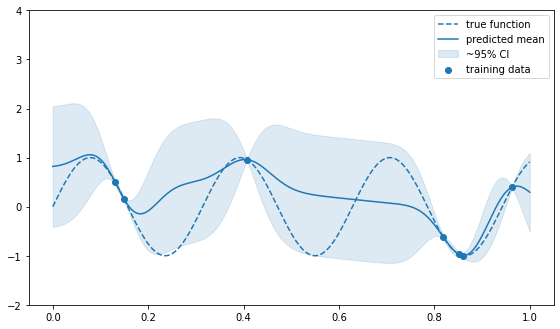

0.6157149


In [4]:
# we add extra point at the end

dataset_2 = Dataset.build_from_function(
    f,
    D,
    n_train_samples=4,
    n_test_samples=0,
    design="srs",
    seed=2,
    l_bounds=[0.8],
    u_bounds=[1]  
)


# we merge them

dataset = dataset_1

dataset.X_train = np.vstack([dataset_1.X_train,dataset_2.X_train])
dataset.y_train = np.append(dataset_1.y_train,dataset_2.y_train)

dataset.sample_size = dataset_1.sample_size + dataset_2.sample_size

dataset.l_bounds = [np.min([dataset_1.l_bounds[0],dataset_2.l_bounds[0]])]
dataset.u_bounds = [np.max([dataset_1.u_bounds[0],dataset_2.u_bounds[0]])]

# choose likelihood
from gpytorch.likelihoods import GaussianLikelihood
likelihood = GaussianLikelihood()

# choose mean function
from gpytorch.means import LinearMean
mean_function = LinearMean(input_size=dataset.input_size)

# choose covariance function (kernel)
from gpytorch.kernels import RBFKernel, ScaleKernel
kernel = ScaleKernel(RBFKernel(ard_num_dims=dataset.input_size))

# choose metrics
from torchmetrics import MeanSquaredError, R2Score
metrics = [MeanSquaredError(), R2Score()]

# define experiment
from GPErks.gp.experiment import GPExperiment
experiment = GPExperiment(
    dataset,
    likelihood,
    mean_function,
    kernel,
    n_restarts=3,
    metrics=metrics,
    seed=2,  # reproducible training
    learn_noise=True  # y = f(x) + e, e ~ N(0, sigma^2I)
)

# train model
from GPErks.train.emulator import GPEmulator
import torch
emulator = GPEmulator(experiment, device="cpu")
optimizer = torch.optim.Adam(experiment.model.parameters(), lr=0.1)
emulator.train(optimizer)

import numpy as np

x_train = dataset.X_train
y_train = dataset.y_train

xx = np.linspace(dataset.l_bounds[0], dataset.u_bounds[0], 1000)

yy_mean, yy_std = emulator.predict(xx)
yy_true = f(xx)

import matplotlib.pyplot as plt
height = 9.36111
width = 5.91667
fig, axis = plt.subplots(1, 1, figsize=(4*width/3, height/2))

axis.plot(xx, yy_true, c="C0", ls="--", label="true function")

CI = 2
axis.plot(xx, yy_mean, c="C0", label="predicted mean")
axis.fill_between(
    xx, yy_mean - CI * yy_std, yy_mean + CI * yy_std, color="C0", alpha=0.15, label="~95% CI"
)
axis.scatter(x_train, y_train, fc="C0", ec="C0", label="training data")
axis.set_ylim([-2,4])
axis.legend(loc="best")
fig.tight_layout()
plt.show()

print(np.max(yy_std[200:900]))

INFO:2022-05-09 11:36:36,763:emulator:train:L83: Training emulator...
INFO:2022-05-09 11:36:36,765:emulator:train:L99: Running restart 1...
/home/crg17/Desktop/KCL_projects/fitting/python/Historia/venv/lib/python3.8/site-packages/gpytorch/models/exact_gp.py:273: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
INFO:2022-05-09 11:36:36,790:emulator:_train_once:L308: [  1/100] Training Loss: 1.4147 - MeanSquaredError: 0.7943 - R2Score: 0.2057
INFO:2022-05-09 11:36:36,801:emulator:_train_once:L308: [  2/100] Training Loss: 1.4014 - MeanSquaredError: 0.7914 - R2Score: 0.2086
INFO:2022-05-09 11:36:36,811:emulator:_train_once:L308: [  3/100] Training Loss: 1.3897 - MeanSquaredError: 0.7875 - R2Score: 0.2125
INFO:2022-05-09 11:36:36,821:emulator:_train_once:L308: [  4/100] Training Loss: 1.3797 - MeanSquaredError: 0.7832 - R2Score: 0.2168
INFO:2022-05-09 11:36:36,836:emulator:_train_once:L308: [  5/100] Training Loss: 1.3713 - 

INFO:2022-05-09 11:36:37,437:emulator:_train_once:L308: [ 60/100] Training Loss: 1.2898 - MeanSquaredError: 0.7668 - R2Score: 0.2332
INFO:2022-05-09 11:36:37,447:emulator:_train_once:L308: [ 61/100] Training Loss: 1.2896 - MeanSquaredError: 0.7668 - R2Score: 0.2332
INFO:2022-05-09 11:36:37,456:emulator:_train_once:L308: [ 62/100] Training Loss: 1.2895 - MeanSquaredError: 0.7668 - R2Score: 0.2332
INFO:2022-05-09 11:36:37,464:emulator:_train_once:L308: [ 63/100] Training Loss: 1.2894 - MeanSquaredError: 0.7667 - R2Score: 0.2333
INFO:2022-05-09 11:36:37,473:emulator:_train_once:L308: [ 64/100] Training Loss: 1.2893 - MeanSquaredError: 0.7667 - R2Score: 0.2333
INFO:2022-05-09 11:36:37,483:emulator:_train_once:L308: [ 65/100] Training Loss: 1.2892 - MeanSquaredError: 0.7667 - R2Score: 0.2333
INFO:2022-05-09 11:36:37,491:emulator:_train_once:L308: [ 66/100] Training Loss: 1.2891 - MeanSquaredError: 0.7667 - R2Score: 0.2333
INFO:2022-05-09 11:36:37,500:emulator:_train_once:L308: [ 67/100] Tra

INFO:2022-05-09 11:36:38,020:emulator:_train_once:L308: [ 21/100] Training Loss: 0.2823 - MeanSquaredError: 0.0010 - R2Score: 0.9990
INFO:2022-05-09 11:36:38,029:emulator:_train_once:L308: [ 22/100] Training Loss: 0.2102 - MeanSquaredError: 0.0010 - R2Score: 0.9990
INFO:2022-05-09 11:36:38,039:emulator:_train_once:L308: [ 23/100] Training Loss: 0.1351 - MeanSquaredError: 0.0009 - R2Score: 0.9991
INFO:2022-05-09 11:36:38,048:emulator:_train_once:L308: [ 24/100] Training Loss: 0.0584 - MeanSquaredError: 0.0009 - R2Score: 0.9991
INFO:2022-05-09 11:36:38,059:emulator:_train_once:L308: [ 25/100] Training Loss: -0.0166 - MeanSquaredError: 0.0008 - R2Score: 0.9992
INFO:2022-05-09 11:36:38,067:emulator:_train_once:L308: [ 26/100] Training Loss: -0.0860 - MeanSquaredError: 0.0007 - R2Score: 0.9993
INFO:2022-05-09 11:36:38,080:emulator:_train_once:L308: [ 27/100] Training Loss: -0.1476 - MeanSquaredError: 0.0005 - R2Score: 0.9995
INFO:2022-05-09 11:36:38,092:emulator:_train_once:L308: [ 28/100] 

INFO:2022-05-09 11:36:38,644:emulator:_train_once:L308: [ 83/100] Training Loss: -1.4139 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,653:emulator:_train_once:L308: [ 84/100] Training Loss: -1.4142 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,662:emulator:_train_once:L308: [ 85/100] Training Loss: -1.4147 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,671:emulator:_train_once:L308: [ 86/100] Training Loss: -1.4154 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,680:emulator:_train_once:L308: [ 87/100] Training Loss: -1.4161 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,689:emulator:_train_once:L308: [ 88/100] Training Loss: -1.4165 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,698:emulator:_train_once:L308: [ 89/100] Training Loss: -1.4165 - MeanSquaredError: 0.0000 - R2Score: 1.0000
INFO:2022-05-09 11:36:38,708:emulator:_train_once:L308: [ 90/1

INFO:2022-05-09 11:36:39,251:emulator:_train_once:L308: [ 44/100] Training Loss: 1.2916 - MeanSquaredError: 0.7603 - R2Score: 0.2397
INFO:2022-05-09 11:36:39,261:emulator:_train_once:L308: [ 45/100] Training Loss: 1.2910 - MeanSquaredError: 0.7607 - R2Score: 0.2393
INFO:2022-05-09 11:36:39,270:emulator:_train_once:L308: [ 46/100] Training Loss: 1.2907 - MeanSquaredError: 0.7612 - R2Score: 0.2388
INFO:2022-05-09 11:36:39,279:emulator:_train_once:L308: [ 47/100] Training Loss: 1.2906 - MeanSquaredError: 0.7611 - R2Score: 0.2389
INFO:2022-05-09 11:36:39,288:emulator:_train_once:L308: [ 48/100] Training Loss: 1.2903 - MeanSquaredError: 0.7606 - R2Score: 0.2394
INFO:2022-05-09 11:36:39,297:emulator:_train_once:L308: [ 49/100] Training Loss: 1.2899 - MeanSquaredError: 0.7604 - R2Score: 0.2396
INFO:2022-05-09 11:36:39,307:emulator:_train_once:L308: [ 50/100] Training Loss: 1.2897 - MeanSquaredError: 0.7605 - R2Score: 0.2395
INFO:2022-05-09 11:36:39,316:emulator:_train_once:L308: [ 51/100] Tra


Bias: 1.8332
Weights: -0.6121804118156433
Outputscale: 2.9808
Lengthscales: 0.11815831810235977
Likelihood noise: 0.0001


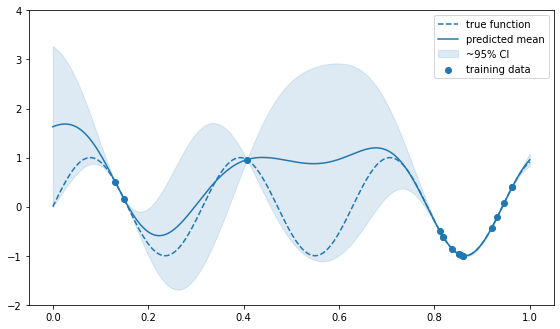

1.0009308


In [5]:
# we add extra point at the end

dataset_2 = Dataset.build_from_function(
    f,
    D,
    n_train_samples=10,
    n_test_samples=0,
    design="srs",
    seed=2,
    l_bounds=[0.8],
    u_bounds=[1]  
)


# we merge them

dataset = dataset_1

dataset.X_train = np.vstack([dataset_1.X_train,dataset_2.X_train])
dataset.y_train = np.append(dataset_1.y_train,dataset_2.y_train)

dataset.sample_size = dataset_1.sample_size + dataset_2.sample_size

dataset.l_bounds = [np.min([dataset_1.l_bounds[0],dataset_2.l_bounds[0]])]
dataset.u_bounds = [np.max([dataset_1.u_bounds[0],dataset_2.u_bounds[0]])]

# choose likelihood
from gpytorch.likelihoods import GaussianLikelihood
likelihood = GaussianLikelihood()

# choose mean function
from gpytorch.means import LinearMean
mean_function = LinearMean(input_size=dataset.input_size)

# choose covariance function (kernel)
from gpytorch.kernels import RBFKernel, ScaleKernel
kernel = ScaleKernel(RBFKernel(ard_num_dims=dataset.input_size))

# choose metrics
from torchmetrics import MeanSquaredError, R2Score
metrics = [MeanSquaredError(), R2Score()]

# define experiment
from GPErks.gp.experiment import GPExperiment
experiment = GPExperiment(
    dataset,
    likelihood,
    mean_function,
    kernel,
    n_restarts=3,
    metrics=metrics,
    seed=2,  # reproducible training
    learn_noise=True  # y = f(x) + e, e ~ N(0, sigma^2I)
)

# train model
from GPErks.train.emulator import GPEmulator
import torch
emulator = GPEmulator(experiment, device="cpu")
optimizer = torch.optim.Adam(experiment.model.parameters(), lr=0.1)
emulator.train(optimizer)

import numpy as np

x_train = dataset.X_train
y_train = dataset.y_train

xx = np.linspace(dataset.l_bounds[0], dataset.u_bounds[0], 1000)

yy_mean, yy_std = emulator.predict(xx)
yy_true = f(xx)

import matplotlib.pyplot as plt
height = 9.36111
width = 5.91667
fig, axis = plt.subplots(1, 1, figsize=(4*width/3, height/2))

axis.plot(xx, yy_true, c="C0", ls="--", label="true function")

CI = 2
axis.plot(xx, yy_mean, c="C0", label="predicted mean")
axis.fill_between(
    xx, yy_mean - CI * yy_std, yy_mean + CI * yy_std, color="C0", alpha=0.15, label="~95% CI"
)
axis.scatter(x_train, y_train, fc="C0", ec="C0", label="training data")
axis.set_ylim([-2,4])
axis.legend(loc="best")
fig.tight_layout()
plt.show()

print(np.max(yy_std[200:900]))